<a href="https://colab.research.google.com/github/dhyey9/OEE_MLOPS/blob/main/OEE_Dataset_and_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate Synthetic Data for Coaches and Athletes


In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate random values within a range
def random_range(min_val, max_val, size=10000):
    return np.random.randint(min_val, max_val + 1, size)

# Create the dataset
data = {
    'Job Working': random_range(135200, 138883),
    'ReadyStatus': random_range(263, 8056),
    'Job Wait': random_range(65300, 76100),
    'OFF or unknown': random_range(28000, 30012),
    'AlarmStatus': random_range(6430, 12197),
    'Job Workingwaitoperator': random_range(8100, 10248),
    'Wait for reset': random_range(280, 1687),
    'Manual job Working': random_range(0, 1618),

    'Bevel Inclined Poly': random_range(438, 560),
    'Bevel Straight Poly': random_range(221, 276),
    'Bevel Straight CR 1': random_range(181, 226),
    'Bevel Straight CR 2': random_range(89, 112),
    'Groove Poly': random_range(68, 76),
    'Bevel Inclined HI': random_range(51, 72),
    'Bevel Straight HI': random_range(31, 42),
    'Groove OR': random_range(9, 13),

    'Cycle Time': random_range(53, 144),
    # 'Ideal Cycle Time': [79, 79, 50, 50, 170, 52, 52, 137] * 12 + [79, 79, 50, 50],

    'Job Correctly Completed': random_range(685, 1314),
    'Lens Rejected (Lens 2)': random_range(42, 72),
    'Lens Rejected (Lens 1)': random_range(18, 47),
    'Cannot Load Lens from Pallet': random_range(8, 41),
    'Server didnt send job': random_range(8, 23),
    'Barcode Not readable': random_range(0, 42),
    'Lens not traceable': random_range(7, 16),
    'Timestamp Identifier not received': random_range(0, 1)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Save to CSV (optional)
df.to_csv('mle_machine_dataset.csv', index=False)

   Job Working  ReadyStatus  Job Wait  OFF or unknown  AlarmStatus  \
0       138374         3521     70003           28175         8710   
1       138707         2860     74738           29768        10179   
2       136060         2763     67072           28883         8968   
3       136494         4829     67464           29098         7446   
4       136330         1250     72411           28142         6873   

   Job Workingwaitoperator  Wait for reset  Manual job Working  \
0                     9343             793                 759   
1                     8495             845                 261   
2                     9580             720                1494   
3                     8207            1549                 331   
4                     8735            1271                 964   

   Bevel Inclined Poly  Bevel Straight Poly  ...  Groove OR  Cycle Time  \
0                  465                  261  ...         11         118   
1                  446          

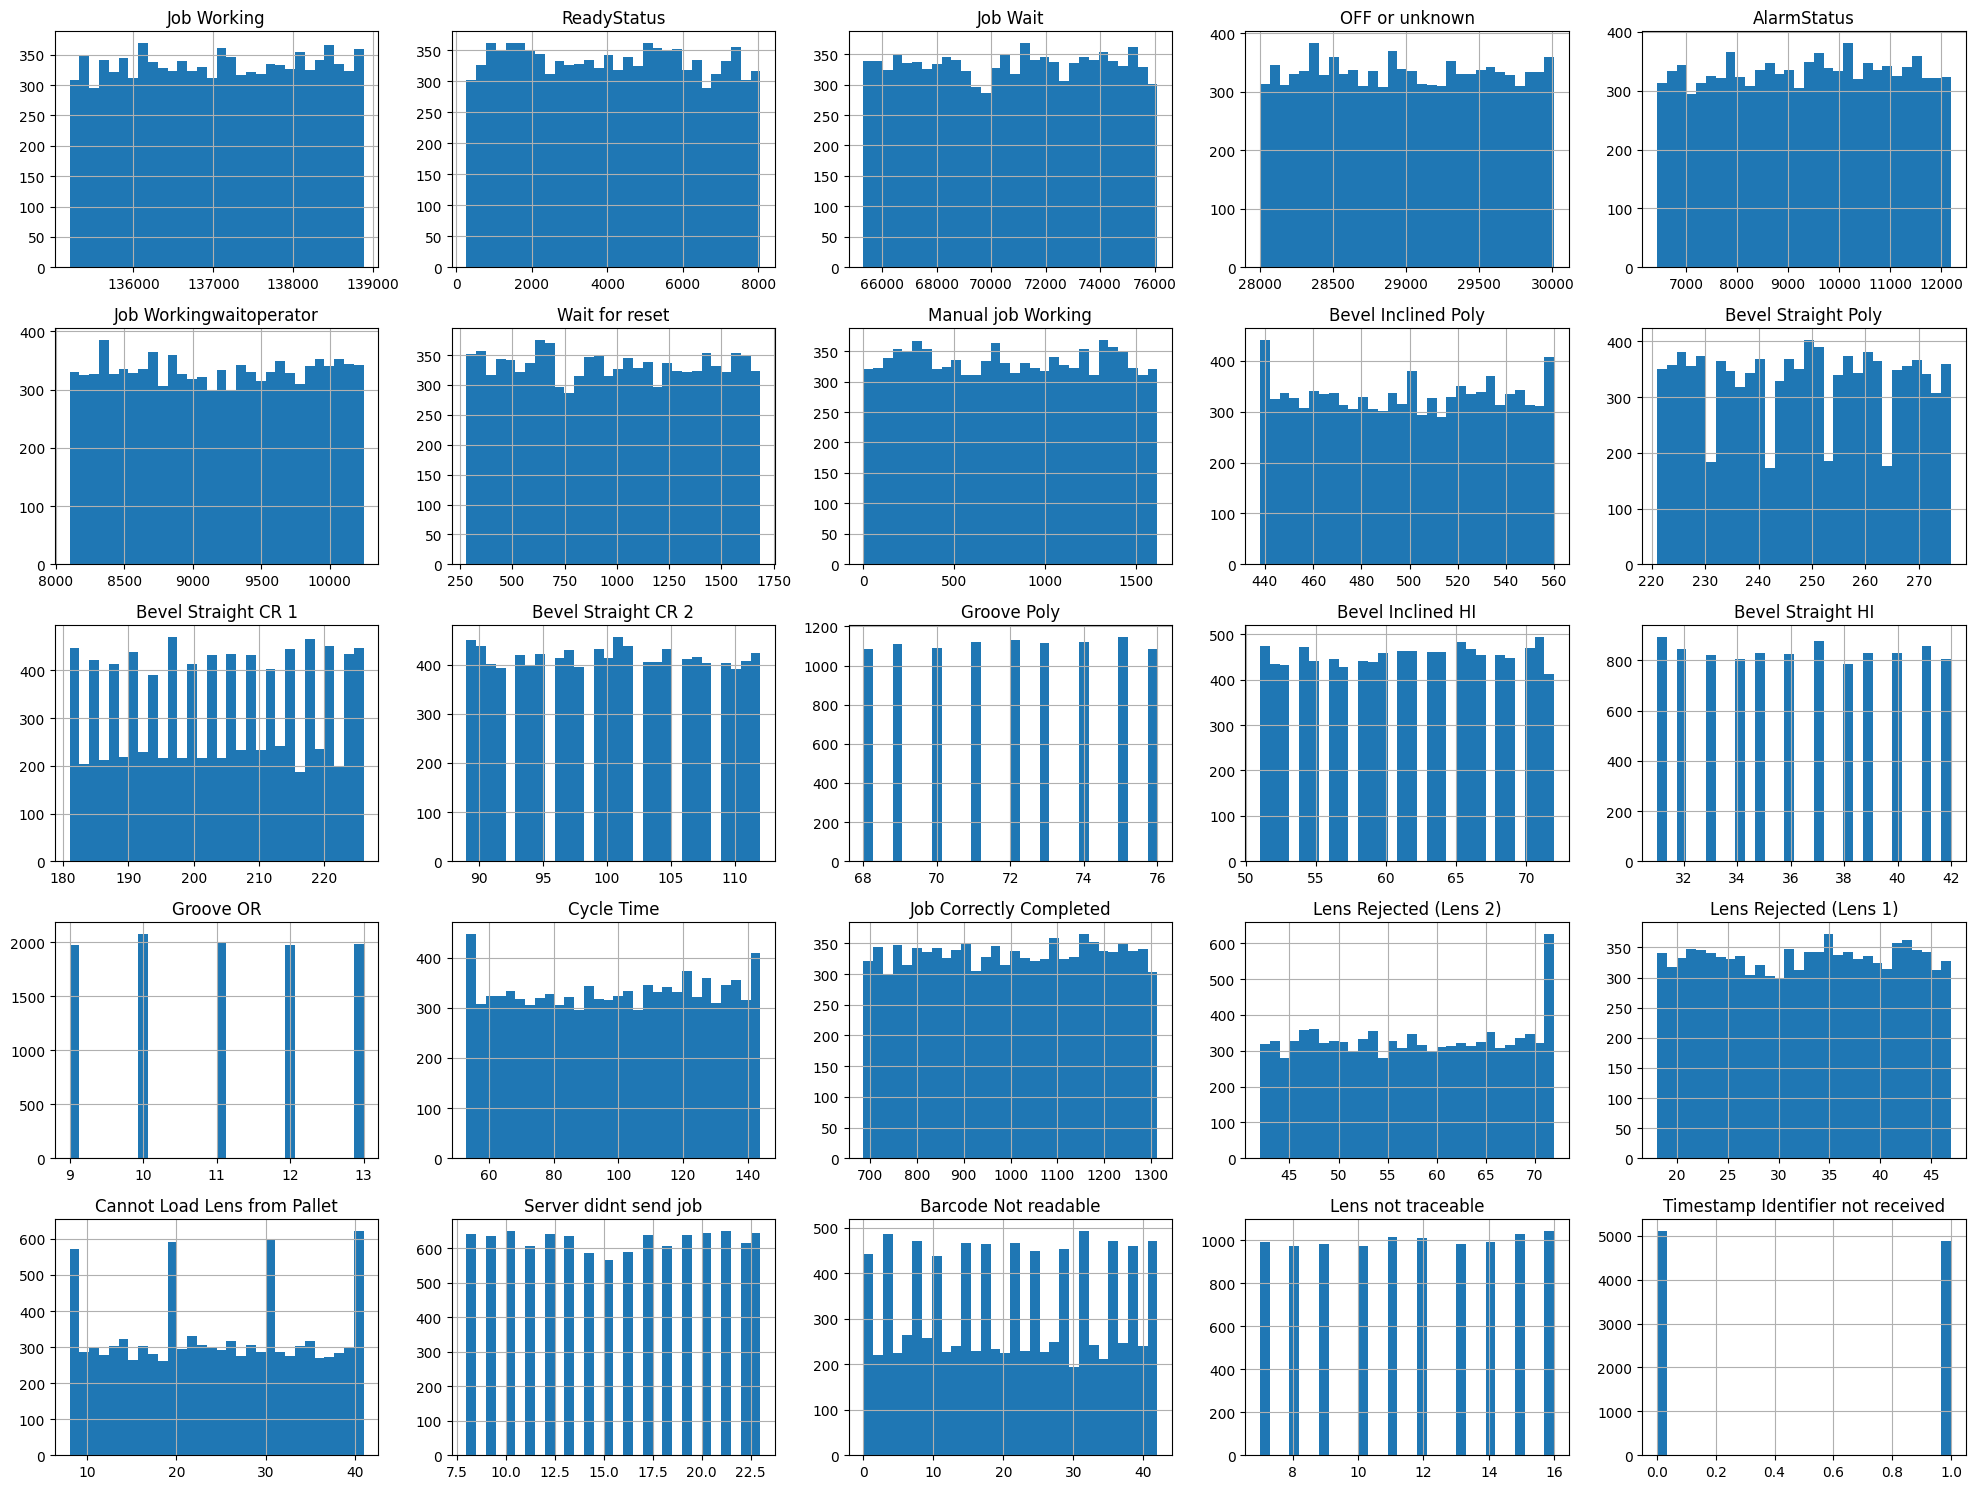

                                   MSE        R2
Linear Regression           730.314012 -0.001887
Ridge Regression            730.313637 -0.001886
Lasso Regression            729.017354 -0.000108
Decision Tree              1376.661500 -0.888584
Random Forest               741.908013 -0.017792
Gradient Boosting           735.514342 -0.009021
XGBoost                     859.303025 -0.178841
K-Nearest Neighbors         846.772860 -0.161652
Support Vector Regression   732.273705 -0.004575
Neural Network              802.989994 -0.101588


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/content/mle_machine_dataset.csv')

# Function to create and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Visualize the distribution of each feature
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

# Standardize the features
scaler = StandardScaler()
X = df.drop(columns=['Cycle Time'])
y = df['Cycle Time']
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor(max_iter=500)
}

# Evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False)

# Display the results
print(results_df)


In [ ]:
# prompt: build model endpoints to load in github for MLOPS practise

# This task requires setting up a separate repository and using tools like Flask or FastAPI to create API endpoints.
# This cannot be done within the scope of a single code response in this environment.

# Here's a basic outline of how you would proceed:

# **1. Create a GitHub Repository:**
#    - Initialize a new repository on GitHub.
#    - Structure it with folders for model, data, tests, and deployment scripts.

# **2. Develop API Endpoints (Example using Flask):**

#